In [3]:
import pandas as pd
l = [2, 2, 3, 6, 7 , 7, 7, 8, 8, 8, 9, 9, 10, 10, 11, 12, 13, 13]
s = pd.Series(l)
s.describe()

count    18.000000
mean      8.055556
std       3.333823
min       2.000000
25%       7.000000
50%       8.000000
75%      10.000000
max      13.000000
dtype: float64

In [2]:
a = [172, 172, 173, 180, 166, 180, 178, 190, 181, 174]
len(a)

10

In [ ]:
proportion.proportions_ztest(count=[ np.mean(baseline), np.mean(vacciene1)], nobs=[len(baseline)* 200, len(vacciene1) * 200], value=0, alternative='larger', prop_var=((np.mean(baseline) + np.mean(vacciene1))/len(baseline)*200+len(vacciene1)*200))

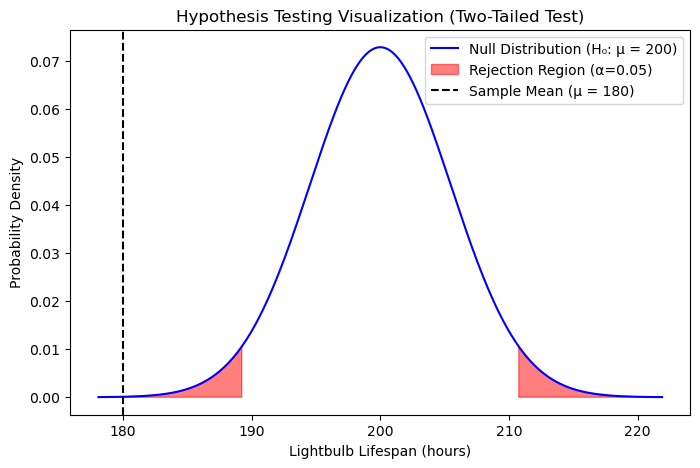

Sample Mean: 180
Z-Score: -3.65
P-Value: 0.0003
Reject H₀: The lightbulb lifespan is significantly different from 200 hours.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import proportion

# Given data
mu_null = 200  # H₀: bulbs last 200 hours
sample_mean = 180  # Our observed mean
sigma = 30  # Assumed population standard deviation
n = 30  # Sample size
alpha = 0.05  # Significance level

# Standard error of the mean
sem = sigma / np.sqrt(n)

# Critical values for a two-tailed test (Z-test since n > 30)
z_critical = stats.norm.ppf(1 - alpha / 2)  # Two-tailed test
lower_critical_value = mu_null - z_critical * sem
upper_critical_value = mu_null + z_critical * sem

# Create x values for normal distribution
x = np.linspace(mu_null - 4 * sem, mu_null + 4 * sem, 1000)
y = stats.norm.pdf(x, mu_null, sem)

# Plot normal distribution under H₀
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Null Distribution (H₀: μ = 200)", color='blue')

# Shade rejection regions
plt.fill_between(x, y, where=(x <= lower_critical_value) | (x >= upper_critical_value), 
                 color='red', alpha=0.5, label="Rejection Region (α=0.05)")

# Plot sample mean
plt.axvline(sample_mean, color='black', linestyle="--", label=f"Sample Mean (μ = {sample_mean})")

# Labels and legend
plt.xlabel("Lightbulb Lifespan (hours)")
plt.ylabel("Probability Density")
plt.title("Hypothesis Testing Visualization (Two-Tailed Test)")
plt.legend()
plt.show()

# Calculate p-value
z_score = (sample_mean - mu_null) / sem
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Sample Mean: {sample_mean}")
print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.4f}")

# Decision rule
if p_value < alpha:
    print("Reject H₀: The lightbulb lifespan is significantly different from 200 hours.")
else:
    print("Fail to Reject H₀: No significant evidence against 200-hour lifespan.")
